# Setup

In [1]:
import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

# Predict Image using Pre-Trained VGG16

In [2]:
'''
Loads the image file and preprocesses it.
Returns both the original PIL image and after preprocessing.
'''
def load_prepare_image(img_path):
  # Load the image from file into PIL format
  image = load_img('sample_image.jpg', target_size=(224, 224))

  # Convert PIL into array
  processed = img_to_array(image)

  # Model expect array of images, extent the dimension
  processed = tf.expand_dims(processed, axis=0)

  # Further pre-process image as required by VGG16
  processed = preprocess_input(processed)

  return image, processed

In [3]:
def predict_image_using_VGG16(image):
  # load the model, using weights as trained from imagenet dataset
  model = VGG16(weights='imagenet')

  # make prediction using pre-trained model
  predictions = model.predict(image)

  # decode the prediction for ease of understanding
  decoded = decode_predictions(predictions, top=3)
  
  # return the first prediction as only 1 image is passed in
  return decoded[0]

In [4]:
def interpret_prediction(prediction):
  # Define ranks for outputting top-3 predictions for image
  ranks = ['Top', 'Second', 'Third']

  # iterate over top 3 predictions
  for i, r in enumerate(ranks):
    # Prediction is an array of [class_name, class_description, score]
    class_name = prediction[i][0]
    class_description = prediction[i][1]
    class_score = prediction[i][2]

    # Print predictions
    print(f'{r} prediction is {class_description} with confidence probability of {class_score:.2f}.')

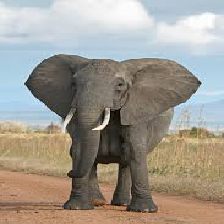

In [5]:
# Load image and display for viewing
orig_image, preprocessed_image = load_prepare_image('sample_image.jpg')
orig_image

In [6]:
# Make predictions and show top 3 predictions
predictions = predict_image_using_VGG16(preprocessed_image)
interpret_prediction(predictions)

Top prediction is African_elephant with confidence probability of 0.93.
Second prediction is tusker with confidence probability of 0.07.
Third prediction is Indian_elephant with confidence probability of 0.00.


# Conclusions

Pre-trained VGG16 is very accurate in predicting images from classes included in the original ImageNet dataset. In fact it achieved a 92.7% top-5 test accuracy in ImageNet.

For transfer learning, the VGG16 model can again be initialized with the weights obtained from ImageNet and then retrained over new datasets. Also, it is possible to remove the fully interconnected layer at the top by initializing the VGG16 model and passing include_top=False as an argument. Engineers can then add the structure of the fully interconnected layer that they desire.

As with many classification architectures which classifies among many classes, the output is a probability of the different classes. We take the class output with the highest probability as the predicted class when doing image classification.